In [14]:
import cfbd
import matplotlib.pyplot as plt
import pandas as pd
from config import api_key
import scipy.stats as st

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [18, 10]

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = api_key
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))

In [2]:
total_points_2004 = []
total_points_2020 = []

In [3]:
games = api_instance.get_games(year=2004)
for game in games:
    total_points_2004.append(int(game.home_points)+int(game.away_points))

games = api_instance.get_games(year=2020)
for game in games:
    total_points_2020.append(int(game.home_points)+int(game.away_points))

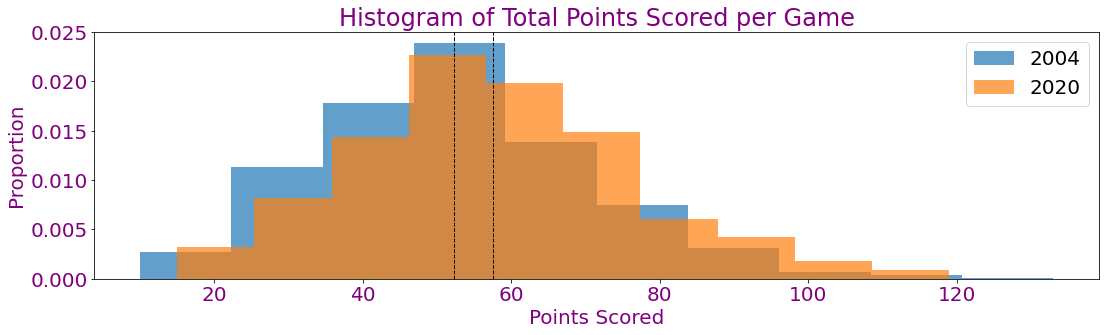

In [16]:
plt.subplot(2, 1, 2)
plt.hist(total_points_2004, 10, density=True, alpha=0.7, label="2004")
plt.hist(total_points_2020, 10, density=True, alpha=0.7, label="2020")
plt.axvline(sum(total_points_2004)/len(total_points_2004), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sum(total_points_2020)/len(total_points_2020), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Total Points Scored per Game", color="purple")
plt.xlabel("Points Scored", color="purple")
plt.ylabel("Proportion", color="purple")
plt.xticks(color="purple")
plt.yticks(color="purple")
plt.legend()  
plt.savefig("Output/Histogram.png")
plt.show()

In [8]:
output_2004 = pd.DataFrame({
    "2004 Total Points": total_points_2004
})
output_2020 = pd.DataFrame({
    "2020 Total Points": total_points_2020
})

In [9]:
output_2004.to_csv("Output/2004_ttest_data.csv", index=False, header=True)
output_2020.to_csv("Output/2020_ttest_data.csv", index=False, header=True)

In [13]:
st.ttest_ind(total_points_2004, total_points_2020, equal_var=False)

Ttest_indResult(statistic=-5.014530349905278, pvalue=6.1526352641952e-07)